# Campaign Target List Prediction

In this notebook we will be training a machince learning model to predict which clients of a banking firm are likely to open a "term deposit" when approached. And using this trained model we will be predicting a target list of 1000 clients to be approached for the campaign for "term deposit" subscription.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df=pd.read_csv('Train.csv')
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0


In [3]:
# Using describe for statictical analysis of numerical columns to look for outliers
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


C:\Users\ishik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ishik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_contacts_prev_campaign', ylabel='Density'>

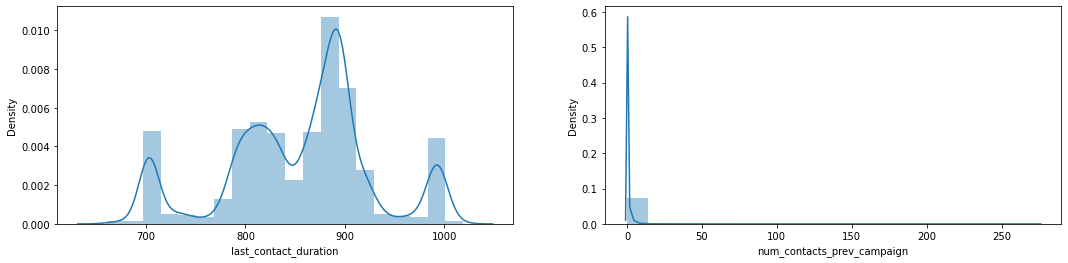

In [4]:
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.distplot(df['last_contact_duration'],bins=20)
plt.subplot(122)
sns.distplot(df['num_contacts_prev_campaign'],bins=20)

C:\Users\ishik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ishik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


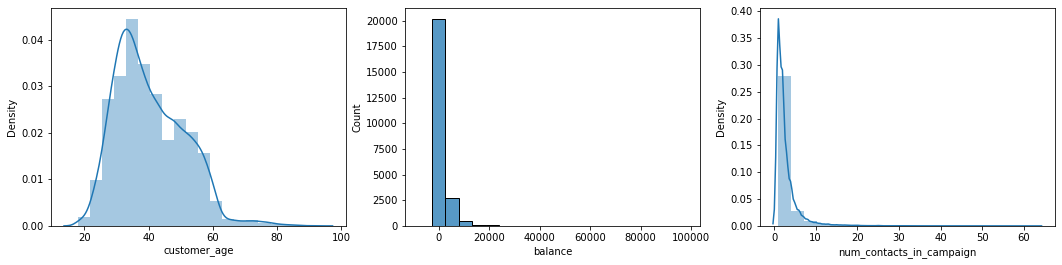

In [5]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(df['customer_age'],bins=20)
plt.subplot(132)
sns.histplot(df['balance'],bins=20)
plt.subplot(133)
sns.distplot(df['num_contacts_in_campaign'],bins=20);

In [6]:
# Handling outliers
df['balance']=[np.NaN if x>=27000 else x for x in df['balance']]
df['num_contacts_in_campaign']=[np.NaN if x>=32 else x for x in df['num_contacts_in_campaign']]
df['num_contacts_prev_campaign']=[np.NaN if x>=20 else x for x in df['num_contacts_prev_campaign']]

In [7]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23564.000000,23880.000000,23880.000000,23756.000000,23840.000000,23880.000000
mean,40.394821,1299.536157,15.796315,854.879648,2.733288,0.528733,0.106198
std,10.753045,2504.775600,8.321136,74.537616,2.887450,1.570128,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,70.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,441.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1402.250000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,26572.000000,31.000000,1019.000000,31.000000,19.000000,1.000000


In [8]:
# Understanding Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23564 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

## Missing Values

In [9]:
dc=df.copy()

# Replacing NaN values with mean in customer_age
v=dc.groupby(dc.job_type).customer_age.mean()
dc.customer_age.fillna(dc.job_type.map(v), inplace=True)

# Replacing NaN values with mode in num_contacts_in_campaign
dc.num_contacts_in_campaign.fillna(dc.num_contacts_in_campaign.mode(), inplace=True)

# Replacing NaN values with median in dc.balance
dc.balance.fillna(dc.balance.median(), inplace=True)

# dropping other NaN values as they can't be predicted
dc.dropna(how='any',inplace=True)

dc.isna().sum().sort_values()

customer_id                   0
num_contacts_prev_campaign    0
num_contacts_in_campaign      0
last_contact_duration         0
month                         0
day_of_month                  0
communication_type            0
prev_campaign_outcome         0
personal_loan                 0
balance                       0
default                       0
education                     0
marital                       0
job_type                      0
customer_age                  0
housing_loan                  0
term_deposit_subscribed       0
dtype: int64

In [10]:
dc.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23498.000000,23498.000000,23498.000000,23498.000000,23498.000000,23498.000000,23498.000000
mean,40.402151,1286.455358,15.792408,854.826794,2.735297,0.528939,0.106307
std,10.665749,2485.607654,8.318109,74.585217,2.894931,1.570394,0.308237
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,74.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,39.000000,441.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1382.000000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,26572.000000,31.000000,1019.000000,31.000000,19.000000,1.000000


In [11]:
#checking for duplicates
dc.duplicated().sum()

0

## DATA LABELING

In [12]:
dk=dc.copy()

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

c=['job_type', 'marital', 'education','default', 'housing_loan', 'personal_loan','communication_type','month','prev_campaign_outcome']
for i in c:
    print(i," : \n",dk[i].unique())    
    dk[i]= label_encoder.fit_transform(dk[i])
    print(i," : ",dk[i].unique())

job_type  : 
 ['blue-collar' 'technician' 'management' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
job_type  :  [ 1  9  4  7  5  2  0  8  3  6 11 10]
marital  : 
 ['married' 'single' 'divorced']
marital  :  [1 2 0]
education  : 
 ['secondary' 'primary' 'tertiary' 'unknown']
education  :  [1 0 2 3]
default  : 
 ['no' 'yes']
default  :  [0 1]
housing_loan  : 
 ['no' 'yes']
housing_loan  :  [0 1]
personal_loan  : 
 ['yes' 'no']
personal_loan  :  [1 0]
communication_type  : 
 ['cellular' 'telephone' 'unknown']
communication_type  :  [0 1 2]
month  : 
 ['nov' 'may' 'aug' 'apr' 'feb' 'jun' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
month  :  [ 9  8  1  0  3  6  5  4 10 11  7  2]
prev_campaign_outcome  : 
 ['other' 'unknown' 'failure' 'success']
prev_campaign_outcome  :  [1 3 0 2]


## FINDING COORELATION

<AxesSubplot:>

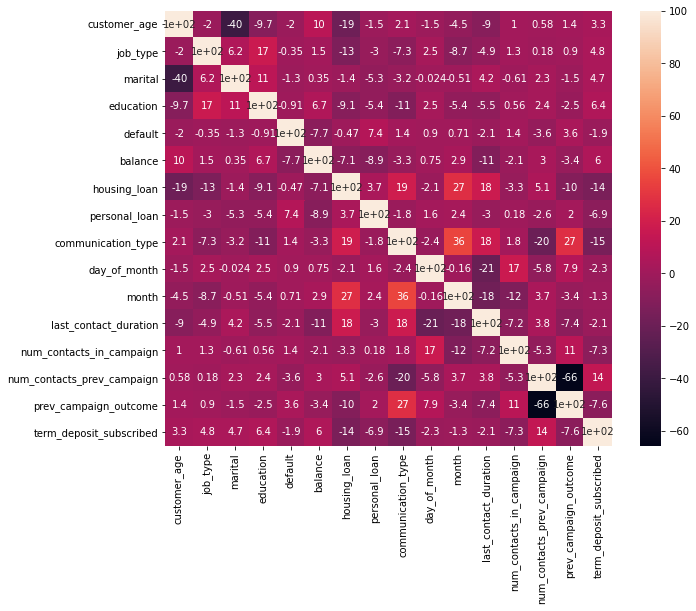

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(dk.corr(method ='pearson', min_periods=1)*100,annot=True)

In [14]:
# removing irrelevent columns like "month","day_of_month","communication_type".
Id=dk['customer_id']
X=dk[['customer_age','job_type','marital', 'education','default','balance','housing_loan','personal_loan',
      'last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign','prev_campaign_outcome']]
y=dk['term_deposit_subscribed']

## Preparing the given Data for Prediction

In [15]:
data = pd.read_excel('EXL_data.xlsx')
data

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,id_29917,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,863,12,jun,2.0,0,unknown
7763,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,843,2,jul,1.0,6,failure
7764,id_16678,56.0,admin.,married,secondary,no,227.0,no,yes,cellular,705,17,nov,1.0,0,unknown
7765,id_26369,28.0,entrepreneur,married,secondary,no,NaN,yes,no,unknown,879,27,may,1.0,0,unknown


In [16]:
data.describe()

,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
count,7625.000000,7645.000000,7767.000000,7767.000000,7751.000000,7767.000000
mean,40.575475,1380.914454,854.417536,15.886958,2.780544,0.615553
std,10.745877,3280.231914,74.628693,8.328768,3.169323,2.069363
min,18.000000,-4062.000000,663.000000,1.000000,1.000000,0.000000
25%,32.000000,74.000000,809.000000,8.000000,1.000000,0.000000
50%,39.000000,465.000000,871.000000,16.000000,2.000000,0.000000
75%,48.000000,1429.000000,897.000000,21.000000,3.000000,0.000000
max,97.000000,102128.000000,1020.000000,31.000000,46.000000,55.000000


In [17]:
# Exploring Data for NaN
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   object 
 1   customer_age                7625 non-null   float64
 2   job_type                    7767 non-null   object 
 3   marital                     7724 non-null   object 
 4   education                   7767 non-null   object 
 5   default                     7767 non-null   object 
 6   balance                     7645 non-null   float64
 7   housing_loan                7767 non-null   object 
 8   personal_loan               7731 non-null   object 
 9   communication_type          7767 non-null   object 
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   object 
 13  num_contacts_in_campaign    7751 

In [18]:
# Replacing NaN values with mean in customer_age
v=data.groupby(data.job_type).customer_age.mean()
data.customer_age.fillna(data.job_type.map(v), inplace=True)

# Replacing NaN values with mode in num_contacts_in_campaign
data.num_contacts_in_campaign.fillna(data.num_contacts_in_campaign.mode(), inplace=True)

# Replacing NaN values with median in dc.balance
data.balance.fillna(data.balance.median(), inplace=True)

# dropping other NaN values as they can't be predicted
data.dropna(how='any',inplace=True)

data.isna().sum().sort_values()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
last_contact_duration         0
day_of_month                  0
month                         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

In [19]:
encoded_data=data.copy()

In [20]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encoding
c=['job_type', 'marital', 'education','default', 'housing_loan', 'personal_loan','communication_type','month','prev_campaign_outcome']
for i in c:
    print(i," : \n",encoded_data[i].unique())    
    encoded_data[i]= label_encoder.fit_transform(data[i])
    print(i," : ",data[i].unique())

job_type  : 
 ['management' 'technician' 'services' 'retired' 'blue-collar' 'admin.'
 'self-employed' 'housemaid' 'entrepreneur' 'unemployed' 'student'
 'unknown']
job_type  :  ['management' 'technician' 'services' 'retired' 'blue-collar' 'admin.'
 'self-employed' 'housemaid' 'entrepreneur' 'unemployed' 'student'
 'unknown']
marital  : 
 ['single' 'married' 'divorced']
marital  :  ['single' 'married' 'divorced']
education  : 
 ['tertiary' 'secondary' 'primary' 'unknown']
education  :  ['tertiary' 'secondary' 'primary' 'unknown']
default  : 
 ['no' 'yes']
default  :  ['no' 'yes']
housing_loan  : 
 ['yes' 'no']
housing_loan  :  ['yes' 'no']
personal_loan  : 
 ['no' 'yes']
personal_loan  :  ['no' 'yes']
communication_type  : 
 ['unknown' 'cellular' 'telephone']
communication_type  :  ['unknown' 'cellular' 'telephone']
month  : 
 ['jun' 'feb' 'may' 'apr' 'nov' 'aug' 'oct' 'jul' 'jan' 'dec' 'mar' 'sep']
month  :  ['jun' 'feb' 'may' 'apr' 'nov' 'aug' 'oct' 'jul' 'jan' 'dec' 'mar' 'sep']
prev

In [21]:
# removing "month","day_of_month","communication_type" columns.
Id_data=pd.DataFrame(encoded_data['customer_id'])
z=encoded_data[['customer_age','job_type','marital', 'education','default','balance','housing_loan','personal_loan',
      'last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign','prev_campaign_outcome']]

# MODEL TRAINING

In [22]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(X, y, test_size=0.4)

from sklearn import metrics
sc={}
res={}

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lrr=LogisticRegression(tol=0.1, max_iter=10000)
lrr.fit(x_train,y_train)
y_pred=lrr.predict(x_test)
print('accuracy_score:',metrics.accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score as cvs
r=cvs(lrr, X, y, cv=10, scoring='accuracy').mean()

# Saving the score in a dictionary for comparison
sc['Logistic Regression']=r
print('cross val score:',r)

accuracy_score: 0.8891489361702127
cross val score: 0.8925866869559703


In [24]:
# Logistic Regression
lrr.fit(X,y)
z_pred=lrr.predict(z)

# Saving the result in a dictionary for comparison
res['Logistic Regression']=z_pred.sum()
print(z_pred.sum(),"/",len(z_pred))

55 / 7672


## K-Neighbors Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.model_selection import GridSearchCV as gscv
knn=kn(n_neighbors=5)
kr=range(1, 35)
weight_options=['uniform', 'distance']
param_grid=dict(n_neighbors=kr, weights=weight_options)
print(param_grid)
grid=gscv(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

sc['K-Nearest Neighbors']=grid.best_score_
print("grid.best_score_ :",grid.best_score_,
      '\ngrid.best_params_ :',grid.best_params_)

{'n_neighbors': range(1, 35), 'weights': ['uniform', 'distance']}
grid.best_score_ : 0.8936931061655932 
grid.best_params_ : {'n_neighbors': 20, 'weights': 'uniform'}


In [26]:
# K-Nearest Neighbors
knn = kn(n_neighbors=24, weights='uniform')
knn.fit(X,y)
z_pred=knn.predict(z)

# Saving the result in a dictionary for comparison
res['K-Nearest Neighbors']=z_pred.sum()
print(z_pred.sum(),"/",len(z_pred))

2 / 7672


## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, y_pred))

# Saving the score in a dictionary for comparison
sc['Naive Bayes']=metrics.accuracy_score(y_test, y_pred)

accuracy_score 0.858404255319149


In [28]:
# Naive Bayes
nb.fit(X,y)
z_pred=nb.predict(z)

# Saving the result in a dictionary for comparison
res['Naive Bayes']=z_pred.sum()
print(z_pred.sum(),"/",len(z_pred))

705 / 7672


## XGB Classifier

In [29]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train,eval_metric='auc')
y_pred=XGB.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, y_pred))
sc['XGB Classifier']=metrics.accuracy_score(y_test, y_pred)

c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy_score 0.8967021276595745


In [30]:
XGB = XGBClassifier()
XGB.fit(X,y)
z_pred = XGB.predict(z)
res['XGB Classifier']=z_pred.sum()
print(z_pred.sum(),"/",len(z_pred))

[15:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


373 / 7672


## Decision Trees Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, y_pred))

# Saving the score in a dictionary for comparison
sc['Decision Trees']=metrics.accuracy_score(y_test, y_pred)

accuracy_score 0.8509574468085106


In [32]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(X,y)
z_pred=dtree.predict(z)

# Saving the result in a dictionary for comparison
res['Decision Tree']=z_pred.sum()
print(z_pred.sum(),"/",len(z_pred))

794 / 7672


## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators = 50)
rfm.fit(x_train,y_train)
y_pred=rfm.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, y_pred))

# Saving the score in a dictionary for comparison
sc['Random Forest']=metrics.accuracy_score(y_test, y_pred)

accuracy_score 0.8996808510638298


In [34]:
# Random Forest
rfm = RandomForestClassifier(n_estimators = 50)
rfm.fit(X,y)
z_pred=rfm.predict(z)

# Saving the result in a dictionary for comparison
res['Random Forest']=z_pred.sum()
print(z_pred.sum(),"/",len(z_pred))

297 / 7672


In [35]:
res

{'Logistic Regression': 55,
 'K-Nearest Neighbors': 2,
 'Naive Bayes': 705,
 'XGB Classifier': 373,
 'Decision Tree': 794,
 'Random Forest': 297}

In [36]:
sc

{'Logistic Regression': 0.8925866869559703,
 'K-Nearest Neighbors': 0.8936931061655932,
 'Naive Bayes': 0.858404255319149,
 'XGB Classifier': 0.8967021276595745,
 'Decision Trees': 0.8509574468085106,
 'Random Forest': 0.8996808510638298}

In [37]:
id_fin=Id_data.copy()

In [38]:
weight_score = sc['Decision Trees']*dtree.predict(z) + sc['Random Forest']*rfm.predict(z) + sc['XGB Classifier']*XGB.predict(z) + sc['K-Nearest Neighbors']*knn.predict(z) + sc['Logistic Regression']*lrr.predict(z) + sc['Naive Bayes']*nb.predict(z)
id_fin.insert(1,'pred_sum',weight_score,True)

In [39]:
id_fin.pred_sum.value_counts()

0.000000    6318
0.850957     402
0.858404     398
2.647340      91
1.709362      87
3.505745      85
1.747660      55
0.896702      36
1.750991      26
1.796383      26
1.755106      22
1.750638      21
2.654787      20
2.606064      19
2.609043      16
0.899681      16
4.398331      11
2.601948       5
2.650672       4
2.647693       4
3.547374       3
1.758085       3
0.893693       2
3.498651       1
3.501629       1
Name: pred_sum, dtype: int64

In [40]:
# Using the weight_score we sorted the data collect the top 1000 clients.
id_fin=id_fin.nlargest(1000,['pred_sum'])

# Saving the result to excel file
id_fin.to_excel('final_result_EXL.xlsx')

id_fin

,customer_id,pred_sum
0,id_43823,0.000000
1,id_10523,0.000000
2,id_43951,0.000000
3,id_12681,0.000000
4,id_2153,0.858404
...,...,...
7762,id_29917,0.000000
7763,id_9275,0.858404
7764,id_16678,0.000000
7765,id_26369,0.000000


In [41]:
fin=data.copy()
fin

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,id_29917,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,863,12,jun,2.0,0,unknown
7763,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,843,2,jul,1.0,6,failure
7764,id_16678,56.0,admin.,married,secondary,no,227.0,no,yes,cellular,705,17,nov,1.0,0,unknown
7765,id_26369,28.0,entrepreneur,married,secondary,no,465.0,yes,no,unknown,879,27,may,1.0,0,unknown


In [42]:
fin = fin.merge(id_fin)

In [43]:
fin

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,pred_sum
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown,0.000000
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown,0.000000
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown,0.000000
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown,0.000000
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure,0.858404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,id_29917,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,863,12,jun,2.0,0,unknown,0.000000
7668,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,843,2,jul,1.0,6,failure,0.858404
7669,id_16678,56.0,admin.,married,secondary,no,227.0,no,yes,cellular,705,17,nov,1.0,0,unknown,0.000000
7670,id_26369,28.0,entrepreneur,married,secondary,no,465.0,yes,no,unknown,879,27,may,1.0,0,unknown,0.000000


In [44]:
fin.sort_values(by=['pred_sum'],ascending=False)

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,pred_sum
1301,id_17244,31.0,management,single,tertiary,no,532.0,no,no,cellular,984,11,feb,1.0,9,success,4.398331
1049,id_39278,86.0,retired,married,secondary,no,81208.0,no,no,telephone,935,1,apr,1.0,3,success,4.398331
5280,id_35254,51.0,unemployed,married,secondary,no,93.0,no,no,cellular,804,10,aug,1.0,14,success,4.398331
4215,id_31985,32.0,self-employed,married,tertiary,no,2667.0,no,no,telephone,837,8,jul,2.0,9,other,4.398331
3547,id_20980,36.0,management,married,tertiary,no,154.0,no,no,cellular,866,9,jun,1.0,9,success,4.398331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,id_30997,44.0,blue-collar,married,primary,no,505.0,yes,no,cellular,895,11,may,1.0,2,failure,0.000000
2797,id_12939,39.0,management,married,secondary,no,-2.0,no,no,cellular,815,30,jul,3.0,0,unknown,0.000000
2796,id_1689,32.0,blue-collar,married,primary,no,351.0,yes,no,unknown,887,19,may,9.0,0,unknown,0.000000
2795,id_21712,26.0,admin.,single,secondary,no,160.0,no,yes,cellular,902,4,may,2.0,0,unknown,0.000000


In [45]:
# Using the weight_score we sorted the data collect the top 1000 clients.
fin=fin.nlargest(1000,['pred_sum'])

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,pred_sum
621,id_19913,33.0,management,single,tertiary,no,2649.0,no,no,cellular,740,13,oct,1.0,10,success,4.398331
857,id_15679,47.0,unemployed,married,secondary,no,922.0,no,no,cellular,802,12,aug,2.0,10,success,4.398331
1049,id_39278,86.0,retired,married,secondary,no,81208.0,no,no,telephone,935,1,apr,1.0,3,success,4.398331
1183,id_41790,62.0,management,married,unknown,no,2356.0,no,no,cellular,714,8,nov,3.0,13,success,4.398331
1301,id_17244,31.0,management,single,tertiary,no,532.0,no,no,cellular,984,11,feb,1.0,9,success,4.398331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,id_40986,34.0,technician,married,tertiary,no,149.0,yes,no,cellular,702,20,nov,3.0,0,unknown,0.850957
1076,id_26464,35.0,blue-collar,married,tertiary,no,2996.0,no,no,unknown,863,12,jun,6.0,0,unknown,0.850957
1110,id_28682,35.0,blue-collar,married,secondary,no,421.0,no,yes,unknown,876,30,may,2.0,0,unknown,0.850957
1116,id_13586,25.0,services,married,secondary,no,683.0,yes,yes,unknown,870,5,jun,2.0,0,unknown,0.850957


In [46]:
# Saving the result to excel file
fin.to_excel('final_clients_list.xlsx')